# K-Nearest Neighbors
Grid Search será usado para selecionar os melhores hiperparâmetros.

In [18]:
import aux

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Carregar os datasets
og_df, pca_df, pearson_df, lda_df = aux.get_datasets()

# Preparar listas para comparação
auc_values = []
f1_score_values = []

### Dataset Original

In [20]:
og_X_train, og_X_test, og_y_train, og_y_test = aux.prepare_dataset(og_df)

Buscando os melhores hiperparâmetros:

'algorithm' não foi usado pois o valor default já decide a melhor abordagem;

'leafsize' geralmente dá maior acurácia com valores menores, mas valores maiores são mais performáticos;

[Cross Validation](https://machinelearningmastery.com/k-fold-cross-validation/) é um método estatístico usado quando temos apenas um conjunto de dados para treinar nosso modelo. A ideia é previnir overfitting, e por isso nossos dados são divididos em diferentes conjuntos. Por sorte, é algo que ganhamos "de graça" ao fazer o GridSearch.

In [21]:
params = {
    'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 50, 100],
}

knn_model = KNeighborsClassifier()
grid_search = RandomizedSearchCV(knn_model, params, random_state=42, n_jobs=-1)
grid_search.fit(og_X_train, og_y_train)

og_best_params = grid_search.best_params_
print(grid_search.best_params_)

{'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 30}


In [22]:
knn = KNeighborsClassifier(**og_best_params)


knn.fit(og_X_train, og_y_train)
y_pred = knn.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7246, Falsos Não-Ataques: 24
Falsos Ataques: 2257, Verdadeiros Não-Ataques: 4978
AUC: 0.842
              precision    recall  f1-score   support

          -1       0.76      1.00      0.86      7270
           1       1.00      0.69      0.81      7235

    accuracy                           0.84     14505
   macro avg       0.88      0.84      0.84     14505
weighted avg       0.88      0.84      0.84     14505



### Dataset Reduzido por Pearson

In [23]:
pearson_X_train, pearson_X_test, pearson_y_train, pearson_y_test = aux.prepare_dataset(pearson_df)

In [24]:
knn_model = KNeighborsClassifier()
grid_search = RandomizedSearchCV(knn_model, params, random_state=42, n_jobs=-1)
grid_search.fit(pearson_X_train, pearson_y_train)

pearson_best_params = grid_search.best_params_
print(grid_search.best_params_)

{'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 30}


In [25]:
knn = KNeighborsClassifier(**pearson_best_params)
knn.fit(pearson_X_train, pearson_y_train)
y_pred = knn.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7257, Falsos Não-Ataques: 13
Falsos Ataques: 199, Verdadeiros Não-Ataques: 7036
AUC: 0.985
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99      7270
           1       1.00      0.97      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por PCA

In [26]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = aux.prepare_dataset(pca_df)

In [27]:
knn_model = KNeighborsClassifier()
grid_search = RandomizedSearchCV(knn_model, params, random_state=42, n_jobs=-1)
grid_search.fit(pca_X_train, pca_y_train)

pca_best_params = grid_search.best_params_
print(grid_search.best_params_)

{'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 30}


In [28]:
knn = KNeighborsClassifier(**pca_best_params)
knn.fit(pca_X_train, pca_y_train)
y_pred = knn.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7212, Falsos Não-Ataques: 58
Falsos Ataques: 67, Verdadeiros Não-Ataques: 7168
AUC: 0.991
              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99      7270
         1.0       0.99      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido Por LDA

In [29]:
lda_X_train, lda_X_test, lda_y_train, lda_y_test = aux.prepare_dataset(lda_df)

In [30]:
knn_model = KNeighborsClassifier()
grid_search = RandomizedSearchCV(knn_model, params, random_state=42, n_jobs=-1)
grid_search.fit(lda_X_train, lda_y_train)

lda_best_params = grid_search.best_params_
print(grid_search.best_params_)

{'weights': 'uniform', 'n_neighbors': 6, 'leaf_size': 20}


In [31]:
knn = KNeighborsClassifier(**lda_best_params)
knn.fit(pca_X_train, pca_y_train)
y_pred = knn.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7259, Falsos Não-Ataques: 11
Falsos Ataques: 112, Verdadeiros Não-Ataques: 7123
AUC: 0.992
              precision    recall  f1-score   support

        -1.0       0.98      1.00      0.99      7270
         1.0       1.00      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Comparação dos Métodos

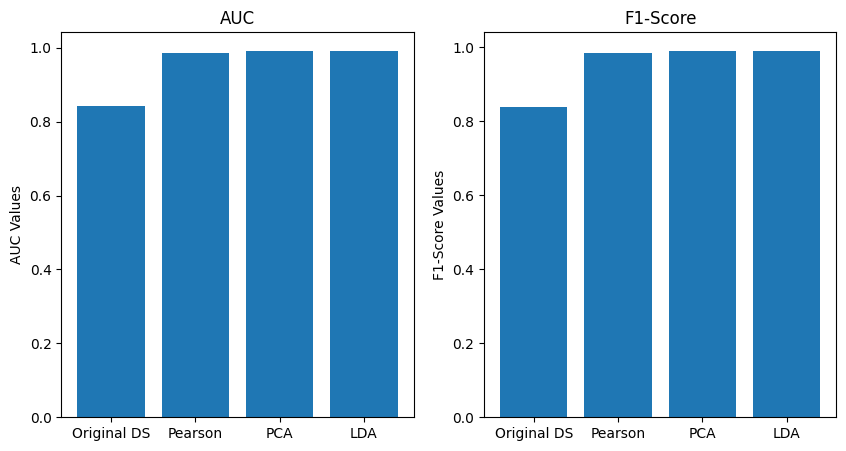

In [32]:
aux.plot_auc_and_f1(auc_values, f1_score_values)